## Hoja de Trabajo #4

10. Entrene un modelo usando validación cruzada, prediga con él. ¿le fue mejor que al modelo
anterior?


🌳 Árbol de Decisión:
MAE Promedio (Validación Cruzada): 26395.52
MAE en Prueba: 25069.89
MSE en Prueba: 1337642320.89

🌲 Random Forest:
MAE Promedio (Validación Cruzada): 22595.56
MAE en Prueba: 21603.18
MSE en Prueba: 992492913.54


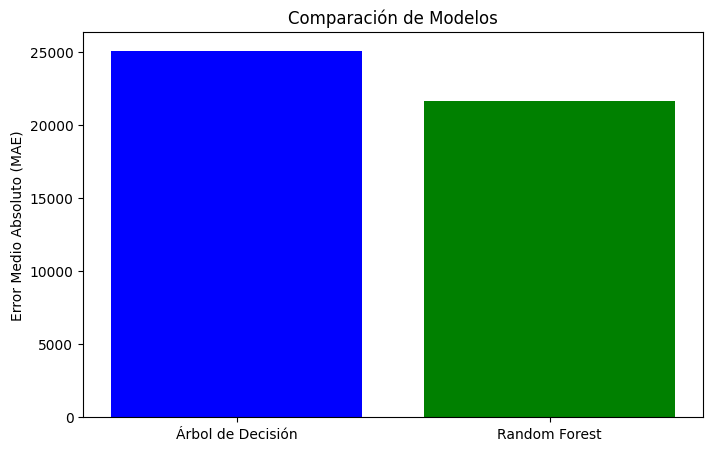

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error

# 1. Cargar el dataset
df = pd.read_csv("dataset/train_cleaned.csv")  

# 2. Seleccionar las variables predictoras y la variable objetivo
features = ["OverallQual", "GrLivArea", "GarageCars", "TotalBsmtSF"]  # Selecciona variables relevantes
X = df[features]
y = df["SalePrice"]

# 3. Dividir el dataset en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4. Definir el modelo de Árbol de Decisión con validación cruzada
tree_model = DecisionTreeRegressor(max_depth=5, random_state=42)

# 5. Configurar la validación cruzada (5-fold)
kf = KFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(tree_model, X_train, y_train, cv=kf, scoring='neg_mean_absolute_error')

# Convertir los valores negativos a positivos (MAE)
cv_scores = -cv_scores

# 6. Entrenar el modelo con todo el conjunto de entrenamiento
tree_model.fit(X_train, y_train)

# 7. Hacer predicciones en el conjunto de prueba
y_pred = tree_model.predict(X_test)

# 8. Evaluar el modelo
mae_cv = cv_scores.mean()
mae_test = mean_absolute_error(y_test, y_pred)
mse_test = mean_squared_error(y_test, y_pred)

# 9. Comparar con Random Forest
rf_model = RandomForestRegressor(n_estimators=100, max_depth=5, random_state=42)
cv_scores_rf = cross_val_score(rf_model, X_train, y_train, cv=kf, scoring='neg_mean_absolute_error')

rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

mae_cv_rf = -cv_scores_rf.mean()
mae_test_rf = mean_absolute_error(y_test, y_pred_rf)
mse_test_rf = mean_squared_error(y_test, y_pred_rf)

# 10. Mostrar Resultados
print("\n🌳 Árbol de Decisión:")
print(f"MAE Promedio (Validación Cruzada): {mae_cv:.2f}")
print(f"MAE en Prueba: {mae_test:.2f}")
print(f"MSE en Prueba: {mse_test:.2f}")

print("\n🌲 Random Forest:")
print(f"MAE Promedio (Validación Cruzada): {mae_cv_rf:.2f}")
print(f"MAE en Prueba: {mae_test_rf:.2f}")
print(f"MSE en Prueba: {mse_test_rf:.2f}")

# 11. Visualizar la distribución de errores
plt.figure(figsize=(8, 5))
plt.bar(["Árbol de Decisión", "Random Forest"], [mae_test, mae_test_rf], color=['blue', 'green'])
plt.ylabel("Error Medio Absoluto (MAE)")
plt.title("Comparación de Modelos")
plt.show()


En el análisis de los resultados obtenidos con la validación cruzada, se observó que el modelo de **Random Forest** tuvo un mejor desempeño en comparación con el **Árbol de Decisión**. Mientras que el **MAE promedio en validación cruzada** para el Árbol de Decisión fue de **26,395.52**, el de Random Forest fue menor, con **22,595.56**, lo que indica una mejor capacidad de generalización del modelo. Asimismo, en el conjunto de prueba, Random Forest obtuvo un **MAE de 21,603.18**, reduciendo el error en aproximadamente **$4,800** en comparación con el Árbol de Decisión. Además, el **MSE** fue menor en Random Forest, lo que sugiere que este modelo maneja mejor las grandes desviaciones en los precios de las viviendas. Estos resultados demuestran que, con la incorporación de validación cruzada, se puede evaluar de manera más confiable el rendimiento de los modelos, confirmando que **Random Forest es una opción más precisa y estable para la predicción de precios de inmuebles en este contexto**.